# King County Housing Analysis Project
* Student name: Bella Scribner
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Morgan Jones
* Blog post URL:


# The Business + Project  

A non-for-profit addiction treatment center is looking to expand their services to offer half-way houses or sober living homes to those who complete the rehabilitation in-patient treatment.  

These sober living homes are fundamental in the psychology of recovery.  Most patients who come out of a rehab facility have bodies and minds still in shock from detox, or do not have the skills to function in society without the crutch of their addiction.  Half-way homes are meant to be a safe space for people in recovery to ease their way back into the real world, giving them the proper amount of time, support, and space to readjust.  This transition phase greatly reduces the risk of relapse.  

The center is inquiring about predictions on how expensive acquiring these houses would be in order to set fundraising and budgeting goals. Based on criteria from state regulators, the homes must include a functioning sewer system, kitchen, and heating system (due to the fact people in these homes may be on parole).  Other than these regulations, the center is interested in predictions based on the size of homes – the larger the home the more people they can accommodate, including live-in staff.  

In this project, we go through the given dataset and utilize linear regression to create a suitable model that predicts the sale price of any given home in King County using applicable variables. 

# The Data
The data for this project was provided and includes data on homes sold in King County, Washington.

In [1]:
import pandas as pd
df = pd.read_csv('data/kc_house_data.csv')

In [2]:
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


----------------------

Descriptions on all of the columns was provided as well.  Below are the descriptions of some relevant columns:

| Column | Description |
| :--- | :--- |
| `price`| Sale price of the home (prediction target) |
| `sqft_living` | Square footage of living space in the home |
| `bathrooms` | Number of bathrooms |
| `greenbelt`| Whether the house is adjacent to a green belt (an area of open land around a city, on which building is restricted) | 
| `waterfront` | Whether the house is on a waterfront (including lake, river/slough waterfronts) |
| `nuisaance` | Whether the house has traffic noise or other recorded nuisances | 
| `view` | Quality of view from house | 
| `condition` | How good the overall condition of the house is. Related to maintenance of house |
| `grade` | Overall grade of the house. Related to the construction and design of the house | 
| `heat_source`| Heat source for the house |
| `sewer_system` | Sewer system for the house |
| `address` | The street address | 
| `lat` | Latitude coordinate of the house |
| `long` | Longitude coordinate of the house | 

The business had some restrictions on heat source and sewer systems, let's investigate that to see if any houses need to be noted or removed from our modeling.

In [5]:
df['heat_source'].value_counts()

Gas                  20583
Electricity           6465
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64

In [6]:
df['sewer_system'].value_counts()

PUBLIC                25777
PRIVATE                4355
PRIVATE RESTRICTED        6
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64

It does not look like this will impact what homes the business can consider to purchase. These are the only two columns with missing data. However, since we are not interested in using these variables to predict house sale prices, we do not need to remove the rows with these missing data.

Let's get a quick view of some of the other columns.

In [7]:
df['waterfront'].value_counts()

NO     29636
YES      519
Name: waterfront, dtype: int64

In [8]:
df['greenbelt'].value_counts()

NO     29382
YES      773
Name: greenbelt, dtype: int64

In [9]:
df['nuisance'].value_counts()

NO     24893
YES     5262
Name: nuisance, dtype: int64

In [10]:
df['view'].value_counts()

NONE         26589
AVERAGE       1915
GOOD           878
EXCELLENT      553
FAIR           220
Name: view, dtype: int64

In [11]:
df['condition'].value_counts()

Average      18547
Good          8054
Very Good     3259
Fair           230
Poor            65
Name: condition, dtype: int64

In [12]:
df['grade'].value_counts()

7 Average        11697
8 Good            9410
9 Better          3806
6 Low Average     2858
10 Very Good      1371
11 Excellent       406
5 Fair             393
12 Luxury          122
4 Low               51
13 Mansion          24
3 Poor              13
1 Cabin              2
2 Substandard        2
Name: grade, dtype: int64

In [13]:
df['address'][0]

'2102 Southeast 21st Court, Renton, Washington 98055, United States'

In [14]:
df[['lat', 'long']]

,lat,long
0,47.461975,-122.19052
1,47.711525,-122.35591
2,47.502045,-122.22520
3,47.566110,-122.29020
4,47.532470,-122.07188
...,...,...
30150,47.664740,-122.32940
30151,47.565610,-122.38851
30152,47.610395,-122.29585
30153,47.449490,-122.18908


# Map of the Houses

Let's get a birds-eye view of King County and the houses sold in our data set.

In [15]:
#pip install geopandas

In [16]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [17]:
df_lat_long = df[['price','lat', 'long']]

In [18]:
# import Kings County Map
KC_map = gpd.read_file('data/map_data/map.shp')

In [19]:
# zip lat and long 
lat_long = [Point(xy) for xy in zip(df_lat_long['long'], df_lat_long['lat'])]

# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(df_lat_long, crs='EPSG:4326', geometry=lat_long)

In [20]:
geo_df.head()

,price,lat,long,geometry
0,675000.0,47.461975,-122.19052,POINT (-122.19052 47.46198)
1,920000.0,47.711525,-122.35591,POINT (-122.35591 47.71153)
2,311000.0,47.502045,-122.22520,POINT (-122.22520 47.50205)
3,775000.0,47.566110,-122.29020,POINT (-122.29020 47.56611)
4,592500.0,47.532470,-122.07188,POINT (-122.07188 47.53247)


In [21]:
geo_df['price'].sort_values(ascending=False)
geo_df = geo_df[geo_df['price'] < 10000000]

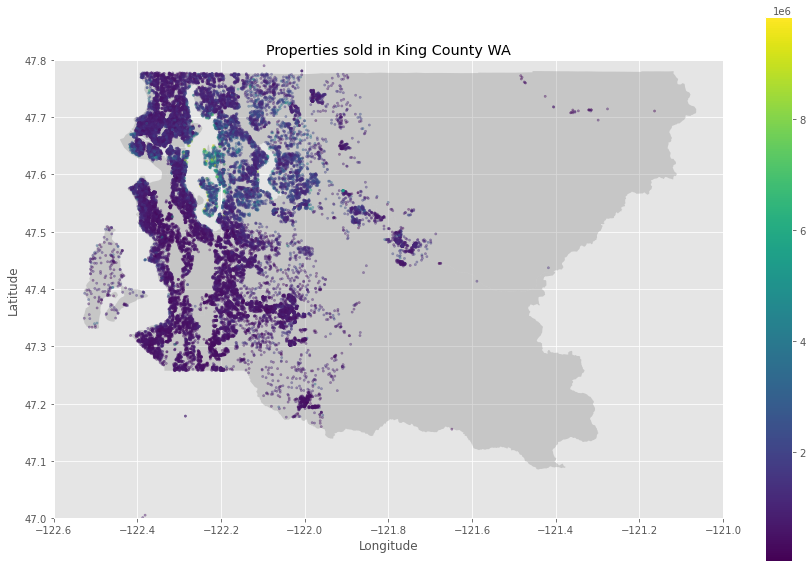

In [22]:
fig, ax = plt.subplots(figsize=(15,10))

# plot lat and long
KC_map.plot(ax=ax, color='grey', alpha=.3)
geo_df.plot(column='price', ax=ax, alpha=.4, legend=True, markersize=5)

# set lat and long boundaries for map display
plt.xlim(-122.6, -121.0)
plt.ylim(47.0, 47.8)

ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_title('Properties sold in King County WA');

# Investigation of Address Information

Let's investigate the address column to ensure that all of the houses in our data set are indeed from King County, Washington.

In [23]:
df['address'][0]

'2102 Southeast 21st Court, Renton, Washington 98055, United States'

In [24]:
df['city'] = df['address'].map(lambda x: x.split(',')[1].strip())
df['city'].value_counts().head(3)

Seattle    9368
Renton     1946
Kent       1583
Name: city, dtype: int64

In [25]:
df['state'] = df['address'].map(lambda x: x.split(',')[2].strip()[:10])
df['state'].value_counts()

Washington    29241
Nebraska 6      159
New Jersey       76
New York 1       66
Minnesota        64
              ...  
Iowa 52241        1
Iowa 50161        1
Texas 7933        1
Iowa 52590        1
Maryland 2        1
Name: state, Length: 82, dtype: int64

Aha!  Not all of the houses sold were in the state of Washington.  Let's remove any data points that are not from Washington State. Furthermore, we can pull in some information from King County to cross reference that all the towns and cities are in this county, and remove any data that are for homes not in this county.

In [26]:
df = df[df['state'] == 'Washington']

In [27]:
cities_towns = pd.read_excel('data/KC_cities_towns.xlsx')
cities_towns.head()

,Name
0,Algona
1,Ames Lake
2,Auburn
3,Baring
4,Barneston


In [28]:
df['city'].isin(cities_towns['Name']).value_counts()

True     29198
False       43
Name: city, dtype: int64

In [29]:
df['city_in_county'] = df['city'].isin(cities_towns['Name'])

In [30]:
df = df[df['city_in_county'] == True]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29198 entries, 0 to 30154
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              29198 non-null  int64  
 1   date            29198 non-null  object 
 2   price           29198 non-null  float64
 3   bedrooms        29198 non-null  int64  
 4   bathrooms       29198 non-null  float64
 5   sqft_living     29198 non-null  int64  
 6   sqft_lot        29198 non-null  int64  
 7   floors          29198 non-null  float64
 8   waterfront      29198 non-null  object 
 9   greenbelt       29198 non-null  object 
 10  nuisance        29198 non-null  object 
 11  view            29198 non-null  object 
 12  condition       29198 non-null  object 
 13  grade           29198 non-null  object 
 14  heat_source     29169 non-null  object 
 15  sewer_system    29185 non-null  object 
 16  sqft_above      29198 non-null  int64  
 17  sqft_basement   29198 non-null 

Wonderful, we have cleaned up our dataset to include only houses within King County, Washington.

# Exploration of Variables for Linear Regression

Linear regression is going to be the method of which we predict how expensive houses will be in King County.  We want to include variables that will be good predictors of price.

In [32]:
df.corr()['price'].map(abs).sort_values(ascending=False)

price             1.000000
sqft_living       0.616631
sqft_above        0.546251
bathrooms         0.488112
sqft_patio        0.317196
lat               0.297828
bedrooms          0.291171
sqft_garage       0.267616
sqft_basement     0.245987
floors            0.200281
yr_built          0.106402
sqft_lot          0.086030
yr_renovated      0.084952
long              0.080210
id                0.029477
city_in_county         NaN
Name: price, dtype: float64

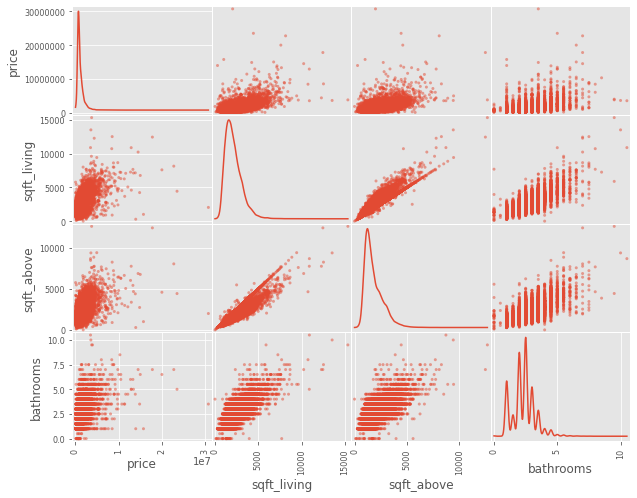

In [33]:
#fig, ax = plt.subplots(figsize=(15,10))
pd.plotting.scatter_matrix(df[['price', 'sqft_living', 'sqft_above', 'bathrooms']], diagonal='kde', figsize=(10,8));

From the above, we can see that `sqft_living`, `bathrooms`, `sqft_above`, all seem promising.  However, in order to avoid multicollinearity, it would be wise to not use both `sqft_living` and `sqft_above` (we can see the highly linear relationship between these two variables in the visual above). Seeing as `sqft_living` has a higher correlation, we will move forward with that variable.   

For a simple linear regression model, which will our baseline model, we will use `sqft_living` as the lone independent variable. Let's take a peek at the distribution of this, the distribution of our target, `price`, and their interaction more closely.

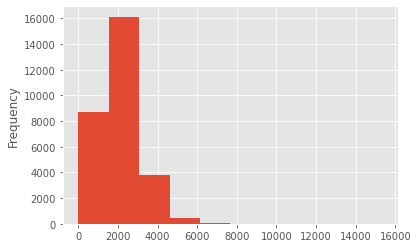

In [34]:
df['sqft_living'].plot.hist();

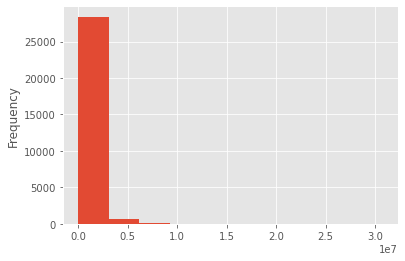

In [35]:
df['price'].plot.hist();

Both distributions look heavily right skewed.  This might cause future issues with our linear regression model(s).

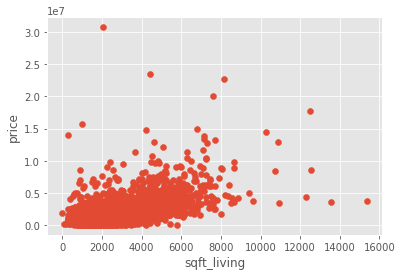

In [36]:
fig, ax = plt.subplots()
plt.scatter(df['sqft_living'], df['price'])
ax.set_xlabel('sqft_living')
ax.set_ylabel('price');

It appears we have a vaguely linear relationship between `sqft_living` and `price`, with a few outliers. 

# Model Iteration

Linear regression is a wonderful tool to create future predictions based on known, historical knowledge.  Going through multiple iterations of models is an important process to ensure the best possible model is used to make these predictions.

## Simple Linear Regression
We will start with a simple linear regression using `sqft_living` and `price`.

In [37]:
X_simple = df[['sqft_living']]
y = df['price']

In [38]:
import statsmodels.api as sm
model_simple = sm.OLS(y, sm.add_constant(X_simple))
results_simple = model_simple.fit()
print(results_simple.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                 1.791e+04
Date:                Sat, 16 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:53:14   Log-Likelihood:            -4.3460e+05
No. Observations:               29198   AIC:                         8.692e+05
Df Residuals:                   29196   BIC:                         8.692e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.142e+04   9893.659     -9.241      

In [39]:
from sklearn.metrics import mean_absolute_error
y_simple_pred = results_simple.predict(sm.add_constant(X_simple))
mean_absolute_error(y, y_simple_pred)

398647.1476557183

The r-squared statistic shows that this simple linear regression is explaining about 38% of the variance in sale price.  The overall model as well as both coefficients are statistically significant. This model predicts that a house with zero square feet living area would sell for negative \\$91k, and for each one square foot increase in living area, a house would become \\$565 more expensive.   Lastly, the Mean Absolute Error shows that the average error is about +/- \\$400k.

### Line of Best Fit
Let's plot the regression line against our known data.

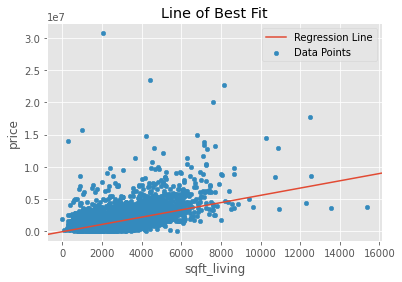

In [40]:
fig, ax = plt.subplots()
df.plot.scatter(x='sqft_living', y='price', label='Data Points', ax=ax)
sm.graphics.abline_plot(model_results=results_simple, label="Regression Line", ax=ax)
plt.title("Line of Best Fit")
ax.legend();

The regression line seems to follow the trend of our data fairly well. However, it can most definately be improved upon.

###  Residuals
The graph of residuals plots the variance not explained by our variable, we ideally want these to be spread out evenly and not have any discernible patterns.

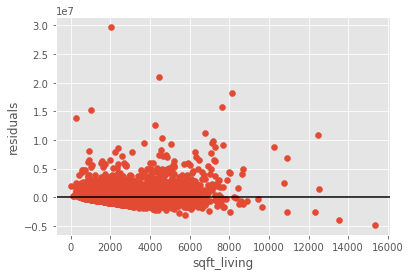

In [41]:
fig, ax = plt.subplots()
ax.scatter(df['sqft_living'], results_simple.resid)
ax.axhline(y=0, color='black')
ax.set_xlabel('sqft_living')
ax.set_ylabel('residuals');

The graph of these residuals reinforce the idea that we are not meeting the assumptions of linear regression, as we saw from the results of the Omnibus and Jarque-Bera tests.  

## Linear Regression with Multiple Variables

Let's see if we can improve upon our linear regression by including more variables.  This will also allow us to report more usable information to the treatment center.   

From a business standpoint, the variables `sqft_living`, `bathrooms`, `waterfront`, `greenbelt`, `nuisance`, `view`, `condition`, and `grade` would all be interesting.  First and foremost, the larger the home, the more patients can utilize the facility at once. Additionally, the number of patients and/or staff acceptable on property will be highly dependent on the number of bathrooms in the home. 

As a transition home for those newly sober, it could be beneficial to live in a home that was somehow connected to or near nature – for example having a waterfront view, or any sort of nice view, or being located near a park or some other type of greenbelt.   On the other hand, if a home was located in an area with known disturbances, such as constant traffic noises, it could delay or impair patients’ success in recovering and transitioning (lack of sleep alone can cause this, thus introducing disturbances or nuisances that would increase the risk of this and other stressors would not be ideal).  Lastly, the condition or grade of the home would be vital information prior to purchase.  These homes need to be up to a certain standard prior to opening as half-way homes or sober living homes.  If the overall state of the house is not up to par, then additional money must be set aside for renovations.  

Moving forward, let's investigate these additional variables prior to creating our multi-variable linear regression. 

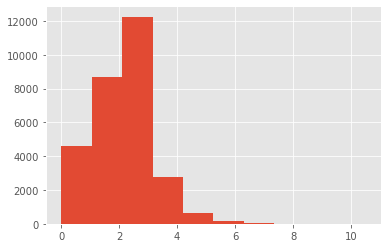

In [42]:
df['bathrooms'].hist();

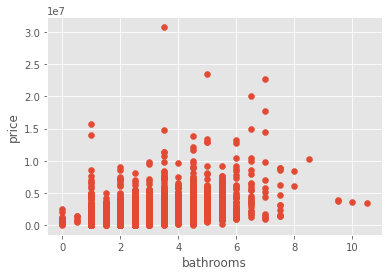

In [43]:
fig, ax = plt.subplots()
plt.scatter(df['bathrooms'], df['price'])
ax.set_xlabel('bathrooms')
ax.set_ylabel('price');

The relationship looks less linear than with our variable `sqft_living`, and again we see that the underlying data has a right skew which can potentially lead to problems with our linear regression moving forward.

### The Categorical Variables

The categorical variables we would like to investigate further are `waterfront`, `greenbelt`, `nuisance`, `view`, `condition`, and `grade`.

In [44]:
# Grade has preset numerical data incorperated, let's create numerical data column to better see graph of the distribution
df['grade_num'] = df['grade'].map(lambda x: int(x[:2].strip()))

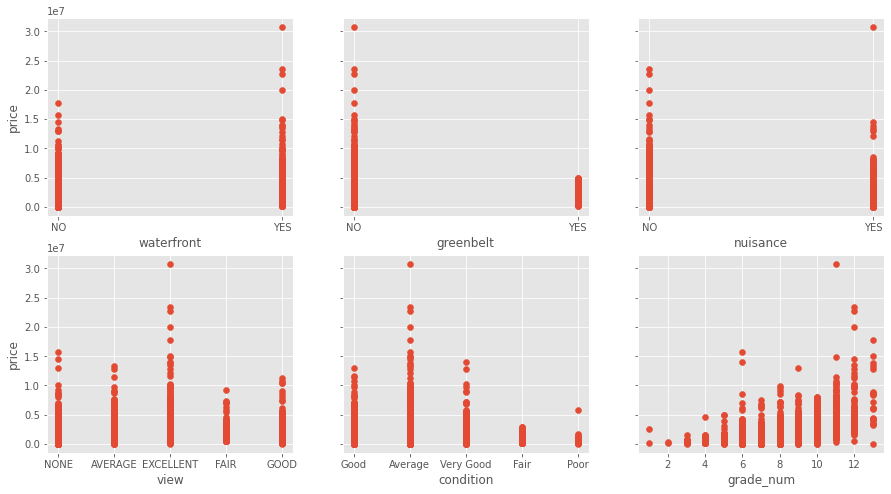

In [45]:
cat_vars = ['waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade_num']

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(15,8), sharey=True)

#Plot relationship between each predictor and target
for i,cat in enumerate(cat_vars):
    # set proper axis
    row = i // 3
    col = i % 3
    ax = axes[row][col]
    
    #set x and y
    x = df[cat]
    y_graph = df['price']
    
    ax.scatter(x, y_graph)
    ax.set_xlabel(cat)
    if col == 0:
        ax.set_ylabel('price')

Based on the visual above we see that:
- `waterfront` does not have much of a linear relationship, rather many data points are clustered between \$0-\$1.5 million for both Yes and No
- `greenbelt` appears to have a negatively linear relationship, with prices decreasing when they are next to a greenbelt.  However, it is important to not the underlying distribution -- the vast majority of homes in our dataset are not next to a greenbelt.
- `nuisance` has a very slight negative linear relationship, if the outlier in the Yes column is excluded.
- `view` is a good candidate to include in our model, fairly linear when ordering as None, Fair, Average, Good, Excellent.
- `condition` also has a quite linear relationship with price, ordering from Fair, Poor, Average, Good, Very Good.  
    - With both `view` and `condition` we see spikes in Average as it is the most common rating for homes in the dataset.
- `grade` has an obviously linear relationship with price, we see more homes become pricier as the grade rating increases.

#### Now that we have investigated these variables a bit, let's go through some preprocessing to get them in a usable format for our regression! 

In [46]:
df['grade'].value_counts()

7 Average        11549
8 Good            8855
9 Better          3584
6 Low Average     2853
10 Very Good      1349
11 Excellent       402
5 Fair             392
12 Luxury          122
4 Low               51
13 Mansion          24
3 Poor              13
1 Cabin              2
2 Substandard        2
Name: grade, dtype: int64

Due to the lack of data points with lower grades, we will create a ‘Lower’ category that will encompass grades 1 through 3. 

In [47]:
# Combine grades 1 through 3 for 'Lower' category
import numpy as np
mask = (df['grade'] == '1 Cabin') | (df['grade'] == '2 Substandard') | (df['grade'] == '3 Poor') 
df['grade_ Lower'] = np.where(mask, 1, 0)
df['grade_ Lower'].value_counts()

0    29181
1       17
Name: grade_ Lower, dtype: int64

In [101]:
# Create DataFrame with 'dummied' categorical variables
cat_vars = ['waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade']
cat_vars_dummied = pd.get_dummies(df[cat_vars])

# Drop one of each column for each variable + add 'dummied' variables to dataset
df_a = cat_vars_dummied.drop(['waterfront_NO', 'view_NONE', 'greenbelt_NO', 'nuisance_NO', 'grade_7 Average', 
                             'condition_Average', 'grade_3 Poor', 'grade_2 Substandard', 'grade_1 Cabin'], axis=1)

# create subset dataframe with only variables want to include in regression
df_b = df[['price', 'sqft_living', 'bathrooms', 'grade_ Lower']]
subset_df = pd.concat([df_b, df_a], axis=1)

Now that we have our encoded categorical variables and a subset of the data we are ready to work with, let's double check correlation.

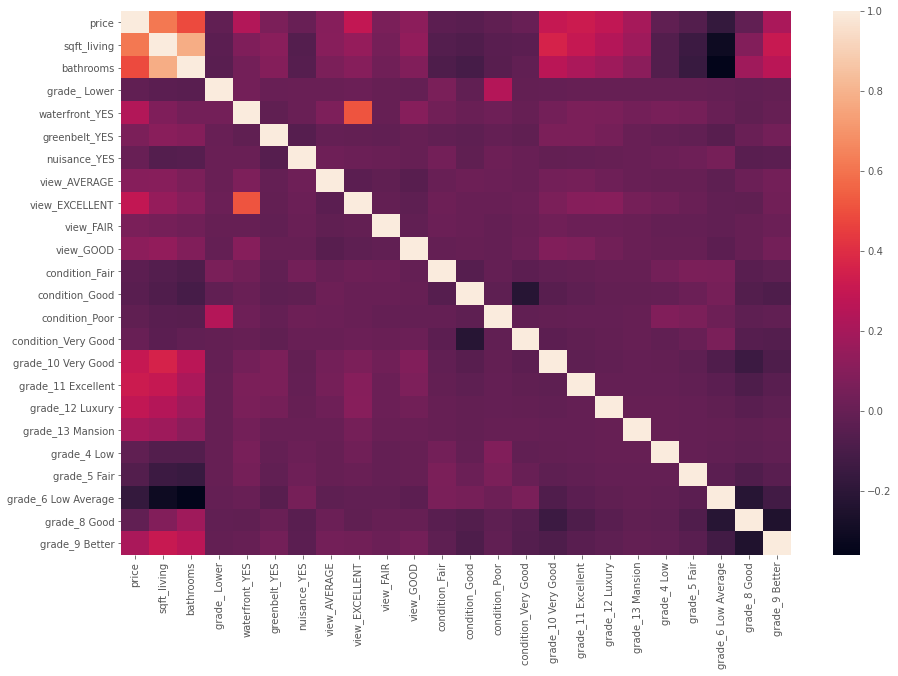

In [49]:
import seaborn as sns
fig = plt.figure(figsize=(15,10))
sns.heatmap(subset_df.corr(), figure=fig);

Based on the heatmap above, it might be a good decision to drop either `bathrooms` or `sqft_living` as they seem to have a high correlation and we would like to avoid multicollinearity. Seeing as `sqft_living` has a slightly higher correlation with our target, we will keep that variable.

In [50]:
subset_df.drop('bathrooms', axis=1, inplace=True)

### The Model
Now that we have processed our categorical variables, it is time to put it all together in our linear regression model!

In [51]:
X_multi = subset_df.drop('price', axis=1)
y = subset_df['price']
model_multi = sm.OLS(y, sm.add_constant(X_multi))
results_multi = model_multi.fit()
print(results_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     1419.
Date:                Sat, 16 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:53:19   Log-Likelihood:            -4.3097e+05
No. Observations:               29198   AIC:                         8.620e+05
Df Residuals:                   29175   BIC:                         8.622e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.515e+05    

In [52]:
y_multi_pred = results_multi.predict(sm.add_constant(X_multi))
mean_absolute_error(y, y_multi_pred)

351637.8742016192

As we can see, this model is an improvement from our baseline simple linear regression. The r-squared has increased and now we are explaining about 52% of the variance in price. The overall model and most of the coefficients are statistically significant at a standard alpha of 0.05.  We do see quite a few coefficients that are not statistically significant, including greenbelt, and the lower ratings of view, grade, and condition. Based on the Mean Absolute Error metric, we can see that the average error for the model is about +/- \$355k, which is an improvement from our simple linear regression.

Lastly, from the Omnibus and Jarque-Bera tests, we can see that our model is not meeting all of the assumptions of linear regression.  

### A Few Graphs of the Results
Below we see the 'best fit' line for the same variable we used in our simple linear regression baseline.  The improvement is visible.  Also displayed is a partial regression plot for all of the coefficients in our model.

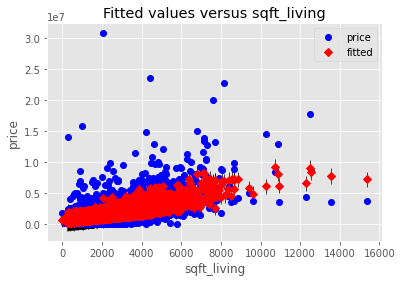

In [53]:
sm.graphics.plot_fit(results_multi, 'sqft_living');

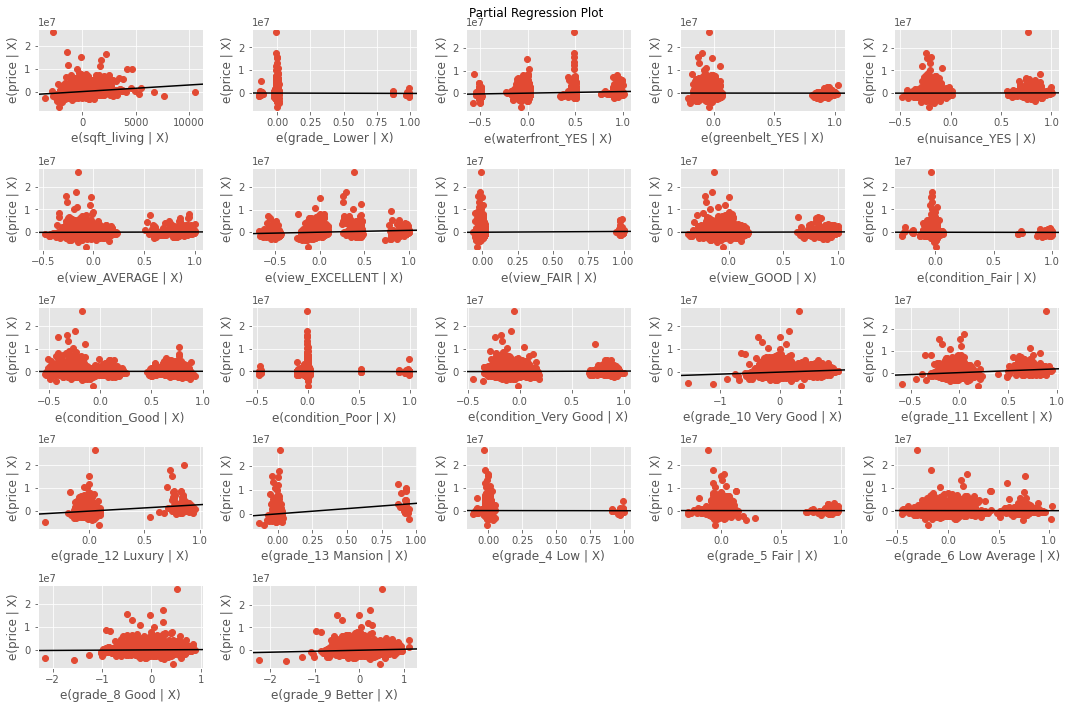

In [57]:
fig = plt.figure(figsize=(15,10))
sm.graphics.plot_partregress_grid(results_multi, exog_idx=list(X_multi.columns.values),
                                 grid=(5,5), fig=fig)
plt.show()

The partial regression plot shows the relationship between price and each coefficient, given the effect of the other independent variables in the model.  We can see from the matrix that most of our coefficients have smaller slopes, and that the coefficients that are not statistically significant have the slopes closest to zero. Based on the strongest slopes, `sqft_living`, and the three three highest categories of grade seem to be the strongest predictors of price.

## Log Transformation

From the earlier data exploration we know that both the target variable, `price`, and the highest correlated variable, `sqft_living`, have heavy right skews.  Transforming these irregular distributions into more normal curves can potentially help improve the model and allow it to better meet the assumptions of linear regression.  We will apply a logarithmic transformation where appropriate in attempt to create an enhanced model. 

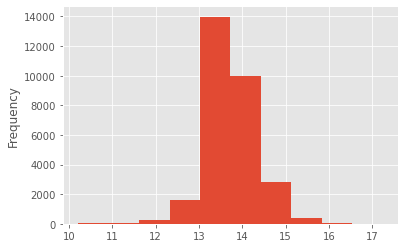

In [58]:
# Create Log Transformed Price + display new distribution
subset_df_1 = subset_df.copy()
subset_df_1['price_log'] = subset_df_1['price'].apply(lambda x: np.log(x))
y_log = subset_df_1['price_log']
y_log.plot.hist();

That curve looks much more normal!

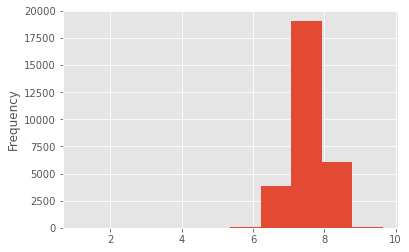

In [59]:
# Create Log Transformed sqft_living + display new distribution
subset_df_1['sqft_living_log'] = subset_df_1['sqft_living'].apply(lambda x: np.log(x))
subset_df_1['sqft_living_log'].plot.hist();

While the original distribution had a right skew, this transformed distribution does not look quite normal either.  Rather it now has a left skew.  In this instance, let’s not include the transformed `sqft_living_log` in the model (we will continue to use the untransformed `sqft_living`).

In [60]:
X_1 = subset_df_1.drop(['price', 'price_log', 'sqft_living_log'], axis=1)

model_y_log = sm.OLS(y_log, sm.add_constant(X_1))
results_y_log = model_y_log.fit()
print(results_y_log.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     1204.
Date:                Sat, 16 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:00:50   Log-Likelihood:                -16392.
No. Observations:               29198   AIC:                         3.283e+04
Df Residuals:                   29175   BIC:                         3.302e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  13.1188    

In [72]:
y_log_pred = results_y_log.predict(sm.add_constant(X_1))
mean_absolute_error(np.exp(y_log), np.exp(y_log_pred))

337662.7323114392

It appears that this model has a decreased r-squared value, however many more of our coefficients are now statistically significant at an alpha of 0.05 (with the exception of condition_Fair, all of our coefficients are now significant).  Our Mean Absolute Error also decreased marginally.  We are still seeing significant Omnibus and Jarque-Bera results indicating that we are still not meeting the assumptions of linear regression.

## Drop Outliers

Another important note from our earlier data exploration was that there are a few outliers in our target variable `price`.  Let's explore that a bit further and try a model without these outliers.

In [61]:
subset_df['price'].sort_values(ascending=False).head(10)

23470    30750000.0
3760     23500000.0
25561    22750000.0
27175    20000000.0
18100    17800000.0
9516     15740000.0
10605    15000001.0
8054     14850000.0
22707    14500000.0
5811     13950000.0
Name: price, dtype: float64

In [62]:
# create dataframe with price outliers dropped
subset_df_2 = subset_df[subset_df['price'] < 20000000]

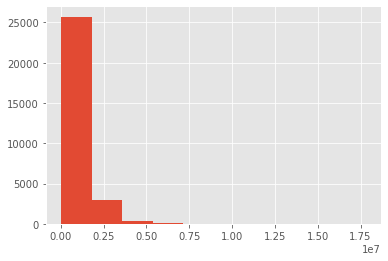

In [63]:
subset_df_2['price'].hist();

While our distribution still has a significant right skew, we do not want to lose too much data. Let's try modeling with this adjustment.

In [73]:
y_2 = subset_df_2['price']
X_2 = subset_df_2.drop('price', axis=1)
model_2 = sm.OLS(y_2, sm.add_constant(X_2))
results_2 = model_2.fit()
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     1534.
Date:                Sat, 16 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:19:38   Log-Likelihood:            -4.2887e+05
No. Observations:               29194   AIC:                         8.578e+05
Df Residuals:                   29171   BIC:                         8.580e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.452e+05   1

In [74]:
y_2_pred = results_2.predict(sm.add_constant(X_2))
mean_absolute_error(y_2, y_2_pred)

347581.13673872105

This model is a small improvement from our first multiple variable linear regression -- the r-squared statistic increased, and the mean absolute error decreased.  We are still seeing a few coefficients that are not statistically significant.   

## Dropped Outliers + Log Transformed Price

Let's try one last model where we apply both of our changes above.  Drop the outliers in price + transform price via a natural log function.

In [77]:
y_3 = np.log(y_2)
X_3 = X_2

model_3 = sm.OLS(y_3, sm.add_constant(X_3))
results_3 = model_3.fit()
print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     1198.
Date:                Sat, 16 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:25:37   Log-Likelihood:                -16365.
No. Observations:               29194   AIC:                         3.278e+04
Df Residuals:                   29171   BIC:                         3.297e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  13.1180    

In [78]:
y_3_pred = results_3.predict(sm.add_constant(X_3))
mean_absolute_error(np.exp(y_3), np.exp(y_3_pred))

335201.6966597995

These results are very similar to the model original y_log model, with a slightly decreased r-squared statistic and mean absolute error statistic. 

# Final Model - Which Iteration is best?

Choosing the best model is highly dependent on our specific scenario.  In this case, while tempting to simply choose the model with the highest explained variance in price, it is actually more important to decrease our error and communicate to the business the most amount of usable information. With this in mind, I will be moving forward with the model that both dropped the outliers and applied and logarithmic transformation for the target `price`.  

While this model did not amend the Omnibus or Jarque-Bera results in a significant manner as we were hoping, the results of this model had the smallest mean absolute error, included the most amount of statistically significant coefficients, and had a r-squared statistic that was improved from our baseline model.

## Standard Scale
Let's take a look at this final model after applying a standard scaling the numerical variable. This will allow us more easily identify what the 'average' house is predicted to cost.

In [96]:
# Standard Scaling the numerical variable
X_stand = X_3.copy()
X_stand['sqft_living'] = (X_stand['sqft_living'] - X_stand['sqft_living'].mean()) \
                        / X_stand['sqft_living'].std()

# Create model with standard scaling
model_stand = sm.OLS(y_3, sm.add_constant(X_stand))
results_stand = model_stand.fit()

# View constant coefficient + confidence interval
print('const coeff:', np.exp(results_stand.params['const']))
print('const confidence interval: \n', np.exp(results_stand.conf_int().loc['const']))

const coeff: 759473.982629381
const confidence interval: 
 0    751803.890562
1    767222.326902
Name: const, dtype: float64


## Prep for Analysis

Let's also pull and transform some of the data in preperation of analysis of this final model.

In [99]:
print('Mean sqft_living:', round(X_3['sqft_living'].mean(),2))

Mean sqft_living: 2130.05


In [118]:
dict_ = {'variables' : list(results_3.params.index), 'coefficients' : list(results_3.params)}
df_coeff = pd.DataFrame(dict_)
df_coeff['coefficient_percentage'] = df_coeff['coefficients'].map(lambda x: round((np.exp(x) - 1)*100,2))
df_coeff.drop([0,10], inplace=True)
df_coeff

,variables,coefficients,coefficient_percentage
1,sqft_living,0.000198,0.02
2,grade_ Lower,-0.490472,-38.77
3,waterfront_YES,0.177907,19.47
4,greenbelt_YES,0.077599,8.07
5,nuisance_YES,0.046954,4.81
6,view_AVERAGE,0.125541,13.38
7,view_EXCELLENT,0.347389,41.54
8,view_FAIR,0.238072,26.88
9,view_GOOD,0.128062,13.66
11,condition_Good,0.067922,7.03


# Analysis + Conclusions

Overall:
- The model is overall statistically significant and explains about 47% of the variance in price.
- The final model includes the following variables: `sqft_living`, `waterfront`, `greenbelt`, `nuisance`, `view`, `condition`, and `grade`.
- All of the coefficients, aside from `condition_Fair`, are statistically significant.

In specific:
- An average house (a house that has a living area of about 2130 square feet, is not on a waterfront, does not have any recorded nuisances, does not have any view, and has a grade and condition of average), will cost about \$760k
- For every one square foot increase in living area, house price increases by about .02\%
- If the house is on a waterfront, then it will be about 19.5\% more expensive than if it was not on a waterfront
- If the house has a recorded nuisance next to it, the model predicts and increase in house price by about 4.8\%
- Breaking down VIEW, compared to having NO view:
   - if house has a Fair view, house price increases by about 26.9\%
   - if house has an Average view, house price increases by about 13.4\%
   - if house has a Good view, house price increases by about 13.7\% 
   - if house has an Excellent view, house price increases by about 41.5\%
   
- Breaking down CONDITION, compared to an Average condition:
   - if the condition is Poor, house price decreases by about 15.5\%
   - if the condition is Good, house price increases by about 7.0\%
   - if the condition is Very Good, house price increases by about 16.2\%

- Breaking down GRADE, compared to an Average grade:
   - if grade is Lower, house price decreases by about 38.8\%
   - if grade is Low, house price decreases by about 21.3\%
   - if grade is Fair, house price decreases by about 19.9\%
   - if grade is Low Average, house price decreases by about 15.7\%
   - if grade is Good, house price increases by about 19.6\%
   - if grade is Better, house price increases by about 52.7\%
   - if grade is Very Good, house price increases by about 84.2\%
   - if grade is Excellent, house price increases by about 115.4\%
   - if grade is Luxury, house price increases by about 119.0\%
   - if grade is Mansion, house price increases by about 79.9\%

The Mean Absolute Error shows that the average error from our model is about +/- \$335k

## Tornado Plot

Let's graph a tornado plot of all the statistically significant coefficients. Specifically, it will be impactful to see the percent change in price for each variable.  It will put a visual to the analysis above, highlighting the most impactful variables.

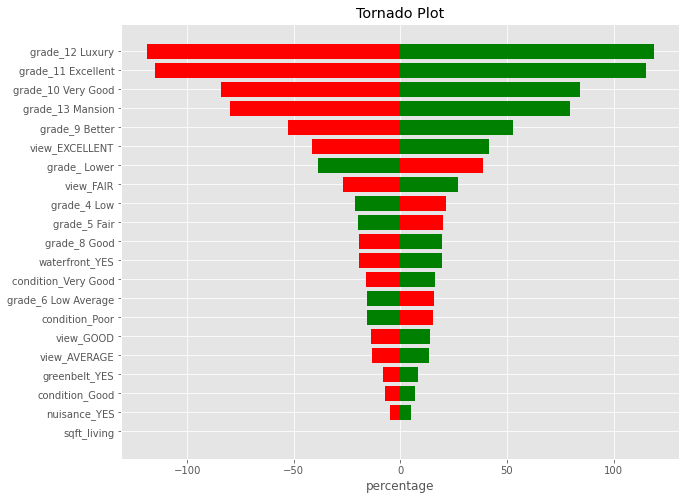

In [125]:
def tornado_plot(categories, values):
    fig, ax = plt.subplots(figsize=(10,8))
    base = 0
    ax.barh(categories, values, left=base, color='green')
    ax.barh(categories, -values, left=base, color='red')
    ax.set_xlabel('percentage')
    ax.set_title('Tornado Plot');

df_coeff['abs_percentage'] = abs(df_coeff['coefficient_percentage'])
df_coeff = df_coeff.sort_values('abs_percentage', axis=0)
tornado_plot(df_coeff['variables'], df_coeff['coefficient_percentage'])

## Suggestions

### 1. Minimum Budget

Plan to budget at least \$760,000 per house plan to purchase.  This is the average price of a home in King County, defined by a house with about 2130 square feet of living area, is not located on a waterfront, is not next to a greenbelt, does not have any recorded nuisances, does not have any view, and has average grade and condition ratings).  

### 2. Condition

King County defines a home with an average condition to have:

> "Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage."

In comparison, a home with a poor condition rating is a 'worn out' home that is near the end of its lifespan.  Although these homes would be about 15% cheaper, the amount of work and money needed to fix the home would most likely negate any savings from purchasing this home rather than one of an average condition.  Thus, it is not recommended to purchase any homes with a poor condition rating.

Furthermore, it would be wise to set aside extra money to purchase a house with either a good or very good condition rating.  All else being the same as our 'average home', this would mean setting aside an additional \\$53k to \\$123k respectively per home.

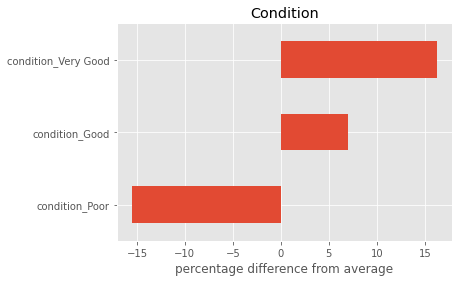

In [153]:
df_coeff.set_index('variables', inplace=True)

conditions = ['condition_Poor', 'condition_Good', 'condition_Very Good']

fix, ax = plt.subplots()

df_coeff['coefficient_percentage'].loc[conditions].plot.barh(ax=ax)

ax.set_ylabel('')
ax.set_xlabel('percent difference from average')
ax.set_title('Condition');

### 3. Grade

King County defines a home with average grade as:

> "Average grade of construction and design. Commonly seen in plats and older sub-divisions."

It is important to note that King County has set the rating of 6 low average as the lowest grade that meets building code standards. Grades 8 through 10 become slightly better in architectural design and construction sequentially.  Grades 11 through 13 generally have custom designs and increased levels of luxurious quality.  

Based on these definitions, it is recommended to only purchase homes that have a grade of 6 or higher.  Similar to condition, the amount of money that would be required to bring the house up to building code standards would most likely exceed the savings from purchasing a lower grade home.

With all else about the home remaining the same as our previously defined 'average home':
- If a home with a grade of low average is purchased, the center could see savings of about \\$120k.
- Furthermore, it would be wise to set aside an additional \\$120k to \\$640k if a home with a grade of good to very good is considered for purchase. 

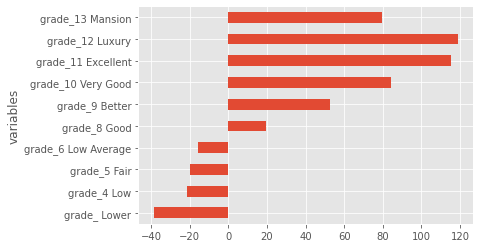

In [141]:
grades = ['grade_ Lower', 'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 
          'grade_8 Good', 'grade_9 Better', 'grade_10 Very Good', 
          'grade_11 Excellent', 'grade_12 Luxury', 'grade_13 Mansion']

df_coeff['coefficient_percentage'].loc[grades].plot.barh();

# Next Steps

It would be beneficial to add information concerning the zone these houses are in.  However, due to the complexity of how zones are distinguished (cities and towns decide these areas rather than the county and they are not mapped along any easily distinguishable data such as zip code), it would be more helpful to incorporate this data once a single or a few specific towns/cities have been targeted.  This information would be beneficial as the residential areas tend to give pushback on companies and people who turn their homes into half-way houses or sober living homes.

From the images below we can see that there is no obvious way to pull the zone based on the address of a specific house from the maps readily available for the city of Seattle.

<img src=images/zip_code_map.jpg width=50% align="left">
<img src=images/Smallzonemap.png width=50% align="right">

As we can see in the above two images, multiple different zones can be in a single zip code. This can be seen on a more granular level from the below image - a section of Seattle that includes the most northern section of zip code area 98102, and the most southern section of sip code area 98105.

<img src=images/zone_map_detail.png width=32% align="center">